### Código

In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [12]:
# style.use('fivethirtyeight')
style.use('ggplot')

In [13]:
np.random.seed(123)
n = 100
tuition = np.random.normal(1000, 300, n).round() # tuition --> mensalidade
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

In [14]:
data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

In [15]:
data.head()

,enem_score,Tuition,Tablet
0,227.622953,674.0,False
1,219.079925,1299.0,True
2,400.889622,1085.0,False
3,122.761509,548.0,False
4,315.064276,826.0,False


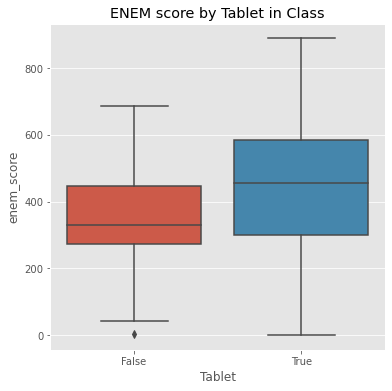

In [17]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='enem_score', x='Tablet', data=data).set_title('ENEM score by Tablet in Class')
# plt.grid(axis='y')
plt.show()

### Entendendo o código

In [18]:
# style.use('fivethirtyeight') --> código que reproduz um determinado estilo, com parâmetros já definidos.

In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [12]:
print(tuition)

[ 674. 1299. 1085.  548.  826. 1495.  272.  871. 1380.  740.  796.  972.
 1447.  808.  867.  870. 1662. 1656. 1301. 1116. 1221. 1447.  719. 1353.
  624.  809. 1272.  571.  958.  741.  923.  160.  469.  790. 1278.  948.
 1001. 1206.  736. 1085.  758.  482.  883. 1172. 1102.  996. 1718. 1124.
 1294. 1671.  612.  688. 1523.  761. 1009. 1321. 1267. 1526. 1449. 1321.
  768. 1238. 1094.  602. 1425. 1242. 1014.  930.  641. 1060. 1141.  751.
 1349.  671.  363. 1312.  879.  962.  749.  518. 1377.  793. 1498. 1242.
  906.  674.  780.  636. 1626. 1049. 1345.  620. 1054. 1353.  899. 1309.
  675.  591. 1114.  886.]


In [11]:
tuition.mean(), tuition.std(), len(tuition)

(1008.09, 338.45939475807137, 100)

In [18]:
print(tablet)

[False  True False False False False  True False  True False  True  True
  True False  True False  True  True  True False False  True False  True
 False False  True False  True False False False False False False  True
 False False False  True False False  True False False False  True False
  True  True False  True  True  True False  True False  True False False
  True  True  True False  True  True False False False False  True  True
  True False  True  True False  True False False  True False  True False
 False False False False  True False False False  True  True  True  True
  True False  True  True]


In [24]:
# print(tablet.dot(1))
print(tablet.astype(int))

[0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1]


<AxesSubplot:>

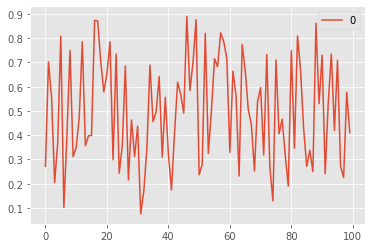

In [22]:
pd.DataFrame(expit((tuition - tuition.mean()) / tuition.std())).plot()

<AxesSubplot:>

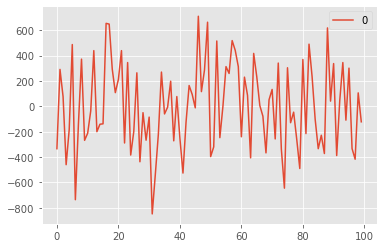

In [81]:
pd.DataFrame((tuition - tuition.mean())).plot()

<AxesSubplot:>

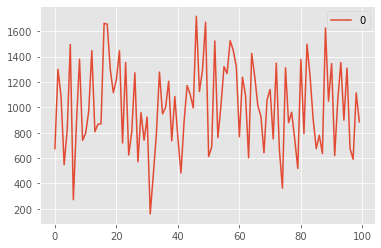

In [80]:
pd.DataFrame(tuition).plot()

In [59]:
# tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)

In [54]:
np.random.seed(123)
b = np.array(np.unique(np.random.binomial(3, 0.5, size=1000), return_counts=True)).T
b

array([[  0, 125],
       [  1, 383],
       [  2, 365],
       [  3, 127]], dtype=int64)

A função acima representa 1.000 testes com três tentativas cada, com uma probabilidade de sucesso de 50% em cada tentativa. O resultado, como vemos no array acima, foi:

- Em 125 (dos 1.000 testes): Todas as três tentativas fracassaram
- Em 383 (dos 1.000 testes): Ao menos uma tentativa teve sucesso
- Em 365 (dos 1.000 testes): Ao menos duas tentativas tiveram sucesso
- Em 127 (dos 1.000 testes): Todas as três tentativas tiveram sucesso

Assim, podemos dizer que as chances de uma determinada quantidade de sucesso é igual a:

- 0: 125/1000 * 100 = 12.5%
- 1: 383/1000 * 100 = 38.3%
- 2: 365/1000 * 100 = 36.5%
- 3: 127/1000 * 100 = 12.7%

In [58]:
127/1000 * 100

12.7

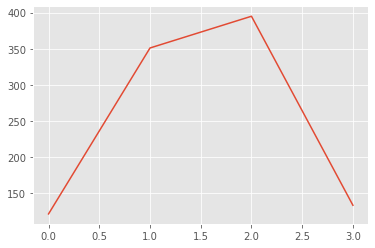

In [52]:
plt.plot(pd.DataFrame(b).drop(0, axis=1));

In [100]:
expit((tuition - tuition.mean()) / tuition.std())

# --> expit: expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function.
# --> Atribui uma probabilidade, conforme o valor (normalizado) da mensalidade. Quanto maior o valor da mensalidade normalizada, maior a probabilidade atribuída.
# --> Se a mensalidade normalizada for maior que 0, a probabilidade será maior que 50%. Se for menor que 0, menor que 50%. E quando for igual a 0, será 50%.
# --> Neste ponto, é definido que a probabilidade de ter tablet será maior quanto mais alta for a mensalidade.

array([0.27148717, 0.70255874, 0.55656569, 0.20434346, 0.36865375,
       0.80823882, 0.10203409, 0.40010174, 0.75004119, 0.31172027,
       0.34827427, 0.47336767, 0.78529387, 0.35636444, 0.3972685 ,
       0.3993928 , 0.87347273, 0.87150053, 0.70379209, 0.57903836,
       0.65227544, 0.78529387, 0.29856618, 0.73478921, 0.24327295,
       0.35704241, 0.68562387, 0.21561417, 0.46306885, 0.31235453,
       0.43747799, 0.07545702, 0.16899369, 0.34426142, 0.68943226,
       0.45573128, 0.49476323, 0.64215684, 0.30919032, 0.55656569,
       0.32324321, 0.17445648, 0.40864096, 0.61875864, 0.56892416,
       0.49107078, 0.89065749, 0.58478882, 0.69946246, 0.87638246,
       0.23680558, 0.27974508, 0.82073493, 0.32518523, 0.50067216,
       0.7159607 , 0.68243098, 0.82203533, 0.78628851, 0.7159607 ,
       0.32973998, 0.66357884, 0.56311813, 0.23150742, 0.77413125,
       0.66621205, 0.50436526, 0.44257404, 0.2526382 , 0.53826787,
       0.59693036, 0.31873553, 0.73247976, 0.26973765, 0.12943

In [62]:
tuition.mean(), tuition.std()

(1008.09, 338.45939475807137)

In [63]:
(tuition - tuition.mean()) / tuition.std() # Normalização dos dados (Média = 0, Std = 1)

array([-0.98709034,  0.85951226,  0.22723553, -1.35936543, -0.53799659,
        1.43860684, -2.17482514, -0.4050412 ,  1.09883196, -0.79208911,
       -0.62663351, -0.10663022,  1.29678776, -0.59117874, -0.41685946,
       -0.40799577,  1.93201905,  1.91429167,  0.86542139,  0.31882702,
        0.62905626,  1.29678776, -0.85413496,  1.01905873, -1.13481855,
       -0.58822418,  0.77973903, -1.29141045, -0.14799412, -0.78913454,
       -0.25140387, -2.50573633, -1.592776  , -0.6443609 ,  0.79746641,
       -0.17753976, -0.02094786,  0.58473779, -0.80390736,  0.22723553,
       -0.73890695, -1.55436666, -0.36958643,  0.48428261,  0.27746312,
       -0.03572068,  2.09747465,  0.34246353,  0.84473944,  1.95861013,
       -1.17027332, -0.94572644,  1.52133464, -0.73004326,  0.00268865,
        0.92451267,  0.76496621,  1.53019833,  1.30269689,  0.92451267,
       -0.70936131,  0.67928385,  0.25382661, -1.19981896,  1.23178735,
        0.6911021 ,  0.01746147, -0.23072192, -1.08459096,  0.15

In [69]:
pd.DataFrame((tuition - tuition.mean()) / tuition.std()).describe().loc[['mean', 'std']].round()

,0
mean,-0.0
std,1.0


<AxesSubplot:>

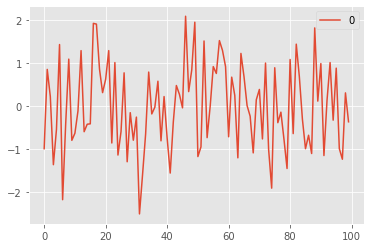

In [64]:
pd.DataFrame((tuition - tuition.mean()) / tuition.std()).plot()

In [74]:
np.random.binomial(3, [0.5, 0.4, 0.3])

array([1, 0, 0])

In [79]:
# expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function.

In [78]:
expit(-6), expit(6), expit(0)

(0.0024726231566347743, 0.9975273768433653, 0.5)

In [82]:
# enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
# enem_score = (enem_score - enem_score.min()) / enem_score.max() --> Coloca os dados entre 0 e 1
# enem_score *= 1000 --> Multiplica os dados por 1.000 para representar o score do Enem

In [84]:
200 - 50 * tablet + 0.7 * tuition

array([ 671.8, 1059.3,  959.5,  583.6,  778.2, 1246.5,  340.4,  809.7,
       1116. ,  718. ,  707.2,  830.4, 1162.9,  765.6,  756.9,  809. ,
       1313.4, 1309.2, 1060.7,  981.2, 1054.7, 1162.9,  703.3, 1097.1,
        636.8,  766.3, 1040.4,  599.7,  820.6,  718.7,  846.1,  312. ,
        528.3,  753. , 1094.6,  813.6,  900.7, 1044.2,  715.2,  909.5,
        730.6,  537.4,  768.1, 1020.4,  971.4,  897.2, 1352.6,  986.8,
       1055.8, 1319.7,  628.4,  631.6, 1216.1,  682.7,  906.3, 1074.7,
       1086.9, 1218.2, 1214.3, 1124.7,  687.6, 1016.6,  915.8,  621.4,
       1147.5, 1019.4,  909.8,  851. ,  648.7,  942. ,  948.7,  675.7,
       1094.3,  669.7,  404.1, 1068.4,  815.3,  823.4,  724.3,  562.6,
       1113.9,  755.1, 1198.6, 1069.4,  834.2,  671.8,  746. ,  645.2,
       1288.2,  934.3, 1141.5,  634. ,  887.8, 1097.1,  779.3, 1066.3,
        622.5,  613.7,  929.8,  770.2])

In [94]:
np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200) # Centro = Função / Desvio Padrão = 200

array([ 862.48471394, 1130.2301114 , 1104.45035942,  484.25129863,
        847.54605474, 1148.45685091,  361.56642654,  959.22184426,
       1051.25863236,  816.44754785,  888.18073406,  974.35467436,
       1661.20782811,  704.95468516,  707.74524303,  718.65091557,
       1297.09037498, 1282.70955616, 1756.38954515,  883.90979446,
       1241.89788768, 1020.50084206,  444.79939045, 1173.05321538,
        551.12831426,  761.1209153 , 1316.10650911,  402.97542   ,
        348.88898531,  523.19611695, 1069.76554767,  609.9712052 ,
       1022.73096407,  783.09588977, 1343.48826246, 1110.82680706,
        838.67498318, 1026.71953063, 1073.37313693,  861.63051744,
        973.70341511,  798.81968337,  736.72757762,  985.08426344,
        912.19420815,  870.15344413, 1238.67070546,  698.95785286,
        779.94167584, 1177.22375111,  427.47562231,  818.48107091,
        997.2961346 ,  691.21850282,  998.27430651, 1245.5021739 ,
       1538.70436999, 1371.69286413, 1325.07187861, 1035.95836

O primeiro parâmetro da função np.random.normal é o Centro, isto é, a Média da distribuição. Nesse caso, temos um array de centros, ou seja, uma média para cada resultado da função passada. O segundo parâmetro é o Desvio Padrão, que vai ser responsável por variar cada ponto da função para cima ou para baixo. Se apenas utilizássemos a função, teríamos uma correlação perfeita, sem ruído (desvio).

In [99]:
np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)

array([ 320.12058184, 1065.482097  , 1272.70198295,  866.32803072,
        843.00927143,  966.9056857 ,  434.69841327,  798.69491879,
        950.58335716,  833.32773124,  694.78327132, 1036.83408892,
       1219.5566928 ,  824.987456  ,  785.30970272,  852.29642968,
       1246.16749707, 1223.98162652,  768.13205873, 1138.05398301,
       1317.55077205,  602.8325078 ,  582.06449722, 1140.6028301 ,
        800.37198954,  724.55497063, 1038.915802  ,  738.53880191,
        820.11503444,  915.7986818 ,  761.96519859,  400.62688895,
        528.67836966,  715.12614368,  856.92781715,  899.66059553,
        900.31578881,  990.40540521,  507.45220085,  657.40382937,
        706.37373061,  364.53387344,  633.67897142,  993.71950661,
        524.15449413, 1196.59329499, 1587.02476599,  737.20901714,
        905.39944213, 1299.40645087,  421.34923441,  996.14062806,
        706.20486191,  922.80459218, 1045.76966201, 1161.7841887 ,
       1047.13729057, 1320.2729675 , 1105.3486612 ,  921.69858